# Exercice 11

In [1]:
# Home-made DFT
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt


def DFT(x):
    N = len(x)
    n = np.arange(N)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

    # Equivalent à k = fftshift(fftfreq(N, 1/N))
    M = np.exp(-2j * np.pi * k * n / N)

    return M @ x / N  # 1/N = dx/L

# Ou en utilisant des boucles (beaucoup plus lent !)


def DFT2(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2)
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1)

    for (i, k_) in enumerate(k):
        for n in range(N):
            X[i] += x[n] * np.exp(-2j * np.pi * k_ * n / N)

    return X / N

# Inverse DFT


def IDFT(X):

    N = len(X)
    n = np.arange(N)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)

    return X @ M

In [2]:
def plot_DFT(k, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all, bounds=(-10, 10)):
    fig, ax = plt.subplots(3, figsize=(15, 15))

    ax[0].plot(x_all, u_all, label="u(x)", c='C0')
    ax[0].plot(x, np.real(u_rec), label="u_rec", c='C1')
    ax[0].plot(x, np.real(u_rec_np), label="u_rec_np", c='C2')
    ax[0].set_title("Time domain")
    ax[0].set_xlabel("$x$")
    ax[0].set_ylabel("$u$")
    ax[0].legend()

    ax[1].stem(k, np.real(u_k), label="$\Re(u_k)$ : DFT",
               markerfmt=" ", basefmt="C0")
    ax[1].stem(k, np.real(u_k_np), label="$\Re(u_k)$ : numpy",
               markerfmt=" ", basefmt="C0--", linefmt="C0--")
    ax[1].stem(k, np.imag(u_k), label="$\Im(u_k)$ : DFT",
               markerfmt=" ", basefmt="C1", linefmt="C1")
    ax[1].stem(k, np.imag(u_k_np), label="$\Im(u_k)$ : numpy",
               markerfmt=" ", basefmt="C1--", linefmt="C1--")
    ax[1].set_xbound(bounds[0], bounds[1])
    ax[1].set_title("Frequency domain")
    ax[1].set_xlabel("$k$")
    ax[1].set_ylabel("$u_k$")
    ax[1].legend()

    ax[2].stem(k, np.abs(u_k),
               markerfmt=" ", basefmt="C0", label="$|u_k|$ : DFT")
    ax[2].stem(k, np.abs(u_k_np),
               markerfmt=" ", basefmt="C0--", linefmt="C0--", label="$|u_k|$ : numpy")
    ax[2].set_xbound(bounds[0], bounds[1])
    ax[2].set_title("Amplitude spectrum")
    ax[2].set_xlabel("$k$")
    ax[2].set_ylabel("$|u_k|$")
    ax[2].legend()

    plt.show()

Temps de calcul pour N = 512 avec DFT :
15.6 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Temps de calcul pour N = 512 avec DFT2 :
377 ms ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Temps de calcul pour N = 512 avec numpy :
14.6 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


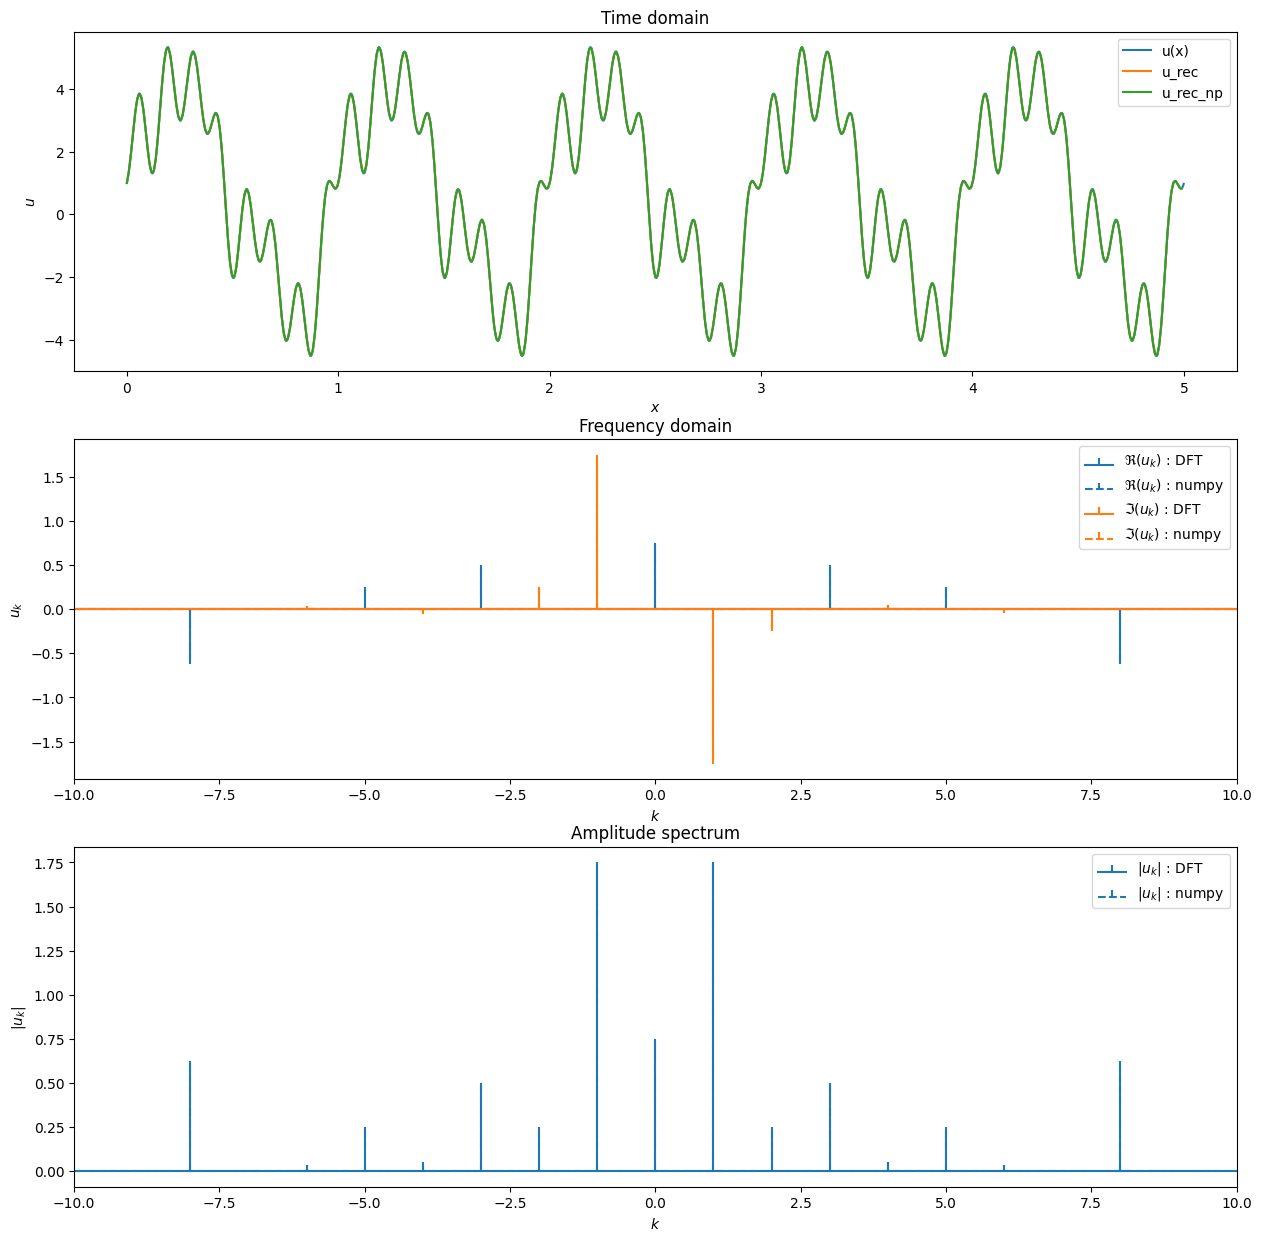

In [3]:
# Test 1: spectre discret
freqs_sin = [1.0, 2.0, 4.0, 6.0]
amplis_sin = [3.5, 0.5, -0.1, 0.075]
freqs_cos = [0.0, 3.0, 5.0, 8.0]
amplis_cos = [0.75, 1.0, 0.5, -1.25]
# -> definit un spectre discret


def f(x): return sum([a * np.sin(2 * np.pi * f * x) for a, f in zip(amplis_sin, freqs_sin)]
                     ) + sum([a * np.cos(2 * np.pi * f * x) for a, f in zip(amplis_cos, freqs_cos)])


L = 5.0  # PS: physical wavenumber is k/L -> plus le domaine et N sont grands, plus on verra les delta de Dirac
x_all = np.linspace(0, L, 5000, endpoint=False)
u_all = f(x_all)

N = 2**9
x = np.linspace(0, L, N, endpoint=False)
u = f(x)
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

print(f"Temps de calcul pour N = {N} avec DFT :")
%timeit DFT(u)
print(f"Temps de calcul pour N = {N} avec DFT2 :")
%timeit DFT2(u)

u_k = DFT(u)
u_rec = IDFT(u_k)

# Via numpy
print(f"Temps de calcul pour N = {N} avec numpy :")
%timeit fftshift(fft(u)) / N

u_k_np = fftshift(fft(u)) / N
u_rec_np = ifft(ifftshift(u_k_np)) * N

plot_DFT(k/L, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all,
         bounds=(-max(freqs_sin + freqs_cos) - 2, max(freqs_sin + freqs_cos) + 2))

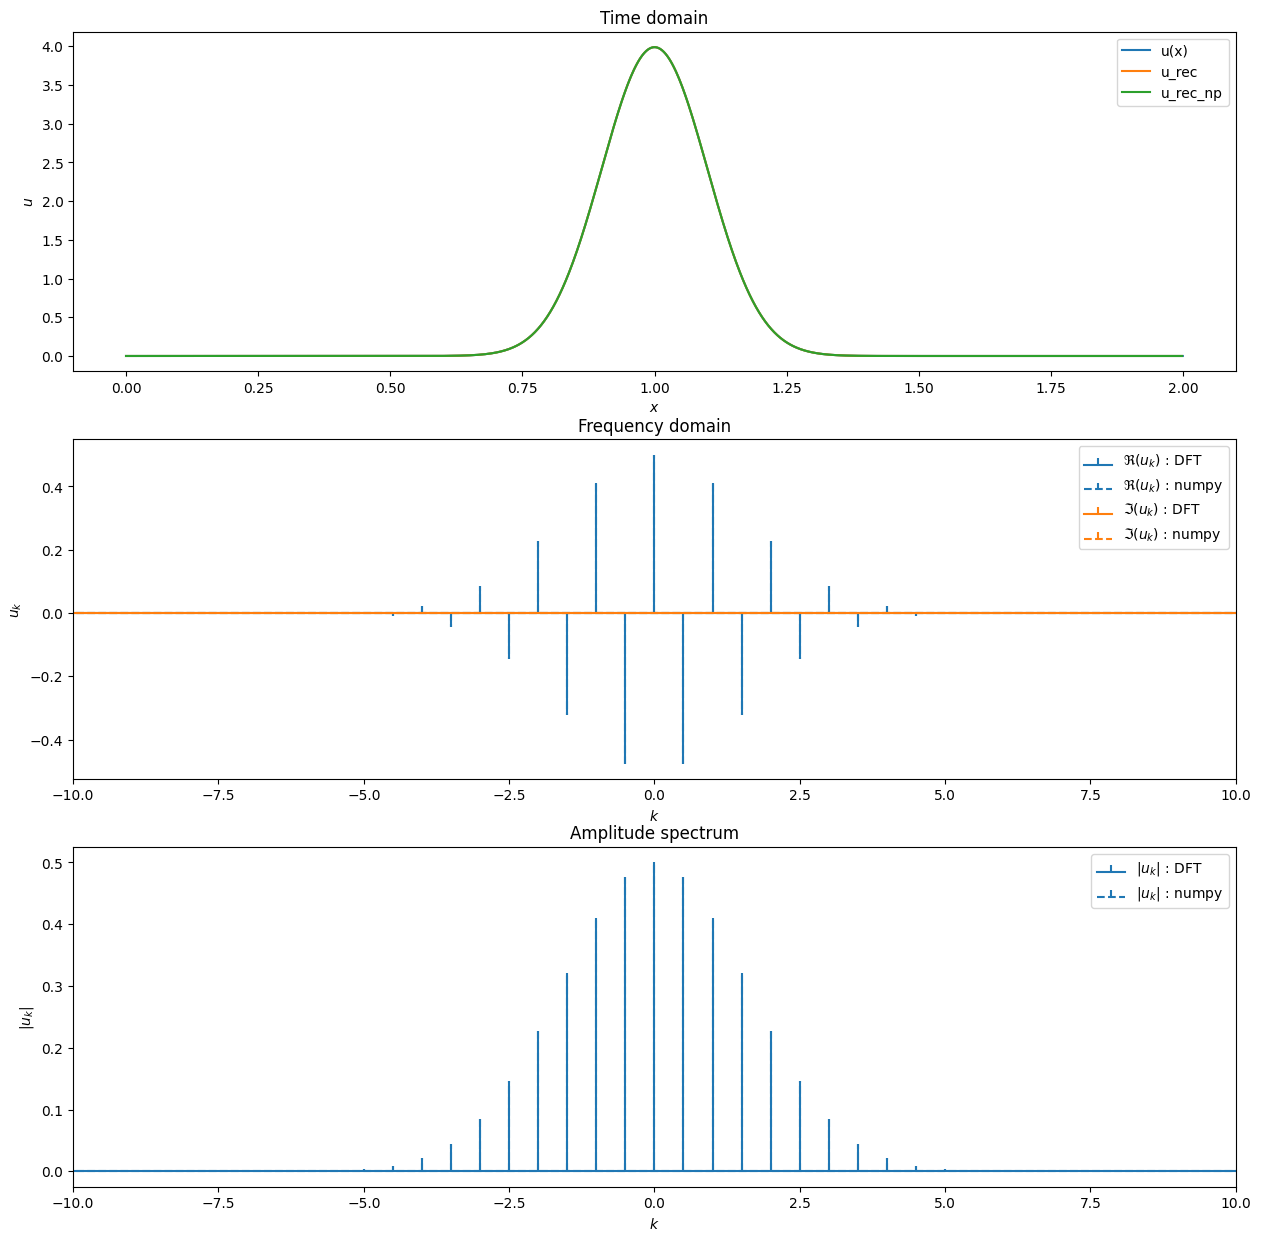

In [4]:
# Test 2: spectre continu
mu, sigma = 1.0, 0.1
L = 2.0


def f(x): return np.exp(- (x - mu)**2 / (2 * sigma**2)) / \
    (sigma * np.sqrt(2 * np.pi))


x_all = np.linspace(0, L, 5000, endpoint=False)
u_all = f(x_all)


def u_analytic(k): return np.exp(1j * k * mu - (sigma*k)
                                 ** 2 / 2) / np.sqrt(2 * np.pi)  # unused


N = 2**10
x = np.linspace(0, L, N, endpoint=False)
u = f(x)
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

u_k = DFT(u)
u_rec = IDFT(u_k)

# Via numpy
u_k_np = fftshift(fft(u)) / N
u_rec_np = ifft(ifftshift(u_k_np)) * N

plot_DFT(k/L, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all)

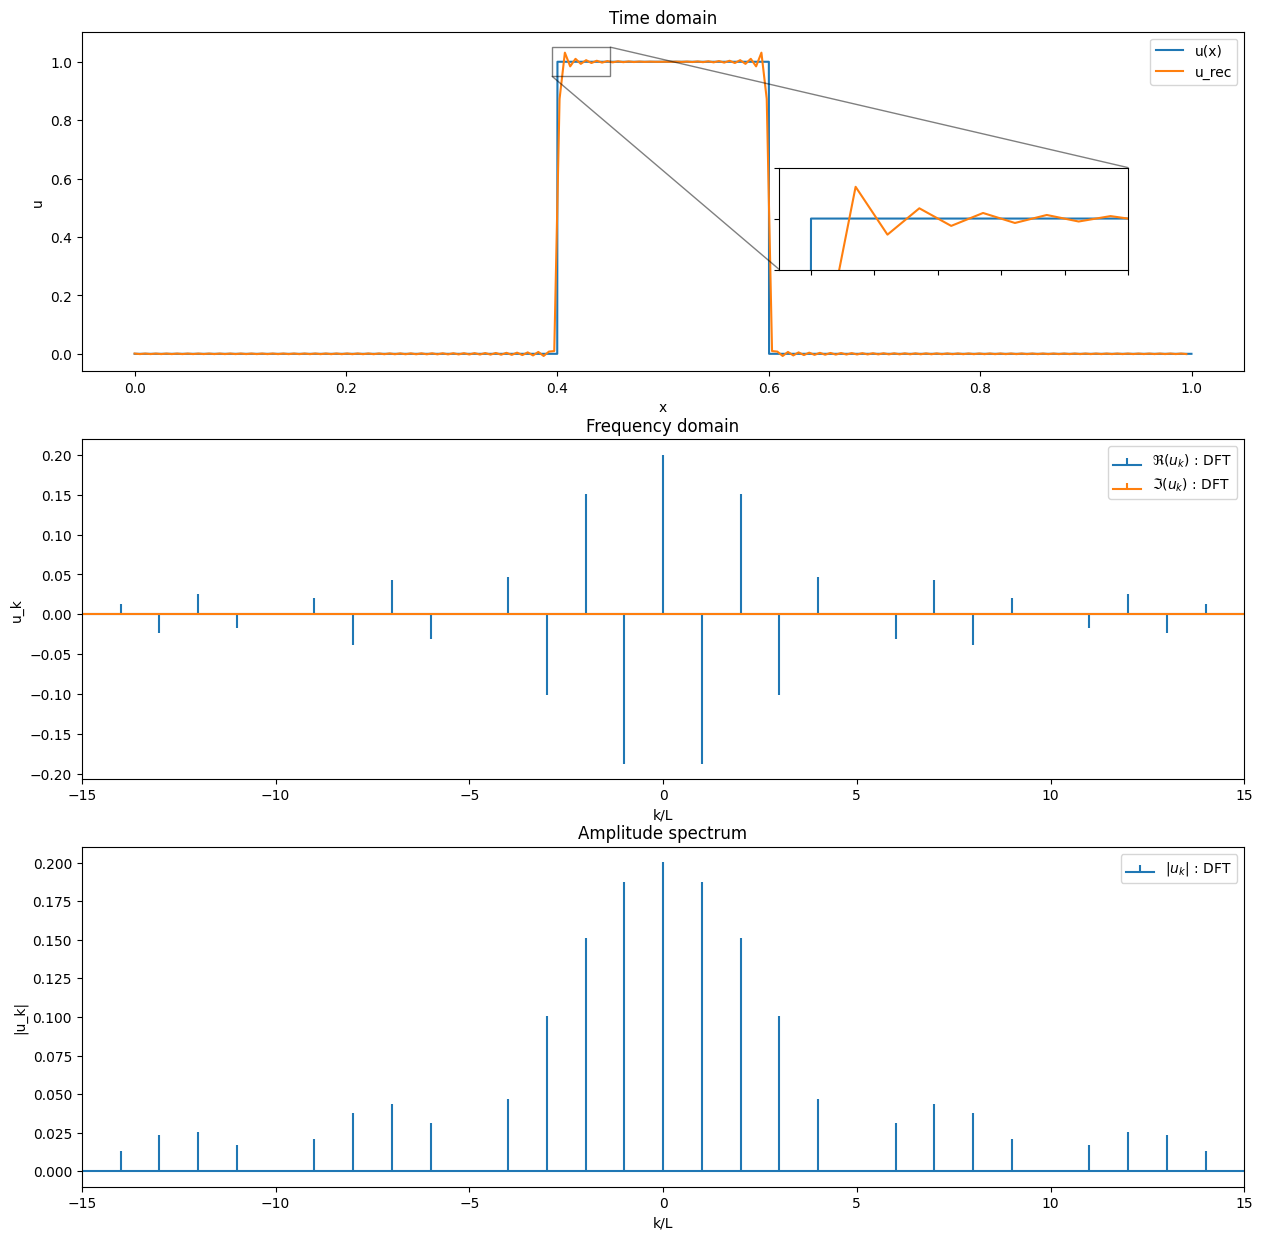

In [5]:
# Test 3 : phénomène de Gibbs
def f(x): return np.where((x >= 0.4) & (x <= 0.6), 1.0, 0.0)


L = 1.0

x_all = np.linspace(0, L, 5000, endpoint=False)
u_all = f(x_all)
# u_analytic ~ sin(k)/k

N = 2**13  # -> compute high res DFT
x = np.linspace(0, L, N, endpoint=False)
u = f(x)
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

# Le phenomène de Gibbs aparait si on tronque une DFT exacte, pas si on la calcule directement avec moins de points !
mask = np.abs(k.flatten()) < 100
u_k = DFT(u)[mask]

u_rec = IDFT(u_k)
x_trunc = np.linspace(0, L, len(u_rec), endpoint=False)

fig, ax = plt.subplots(3, figsize=(15, 15))

ax[0].plot(x_all, u_all, label="u(x)", c='C0')
ax[0].plot(x_trunc, np.real(u_rec), label="u_rec", c='C1')
axin = ax[0].inset_axes(
    [0.6, 0.3, 0.3, 0.3],
    xlim=(0.395, 0.45), ylim=(0.95, 1.05), xticklabels=[], yticklabels=[]
)
axin.plot(x_all, u_all, c='C0')
axin.plot(x_trunc, np.real(u_rec), c='C1')

ax[0].indicate_inset_zoom(axin, edgecolor="black")
ax[0].set_title("Time domain")
ax[0].set_xlabel("x")
ax[0].set_ylabel("u")
ax[0].legend()

ax[1].stem(k[mask]/L, np.real(u_k), label="$\Re(u_k)$ : DFT",
           basefmt="C0", linefmt="C0", markerfmt="")
ax[1].stem(k[mask]/L, np.imag(u_k), label="$\Im(u_k)$ : DFT",
           basefmt="C1", linefmt="C1", markerfmt="")
ax[1].set_xbound(-15, 15)
ax[1].set_title("Frequency domain")
ax[1].set_xlabel("k/L")
ax[1].set_ylabel("u_k")
ax[1].legend()

ax[2].stem(k[mask]/L, np.abs(u_k),
           markerfmt=" ", basefmt="C0", label="$|u_k|$ : DFT")
ax[2].set_xbound(-15, 15)
ax[2].set_title("Amplitude spectrum")
ax[2].set_xlabel("k/L")
ax[2].set_ylabel("|u_k|")
ax[2].legend()

plt.show()

In [6]:
%reset -f

# Exercice 12

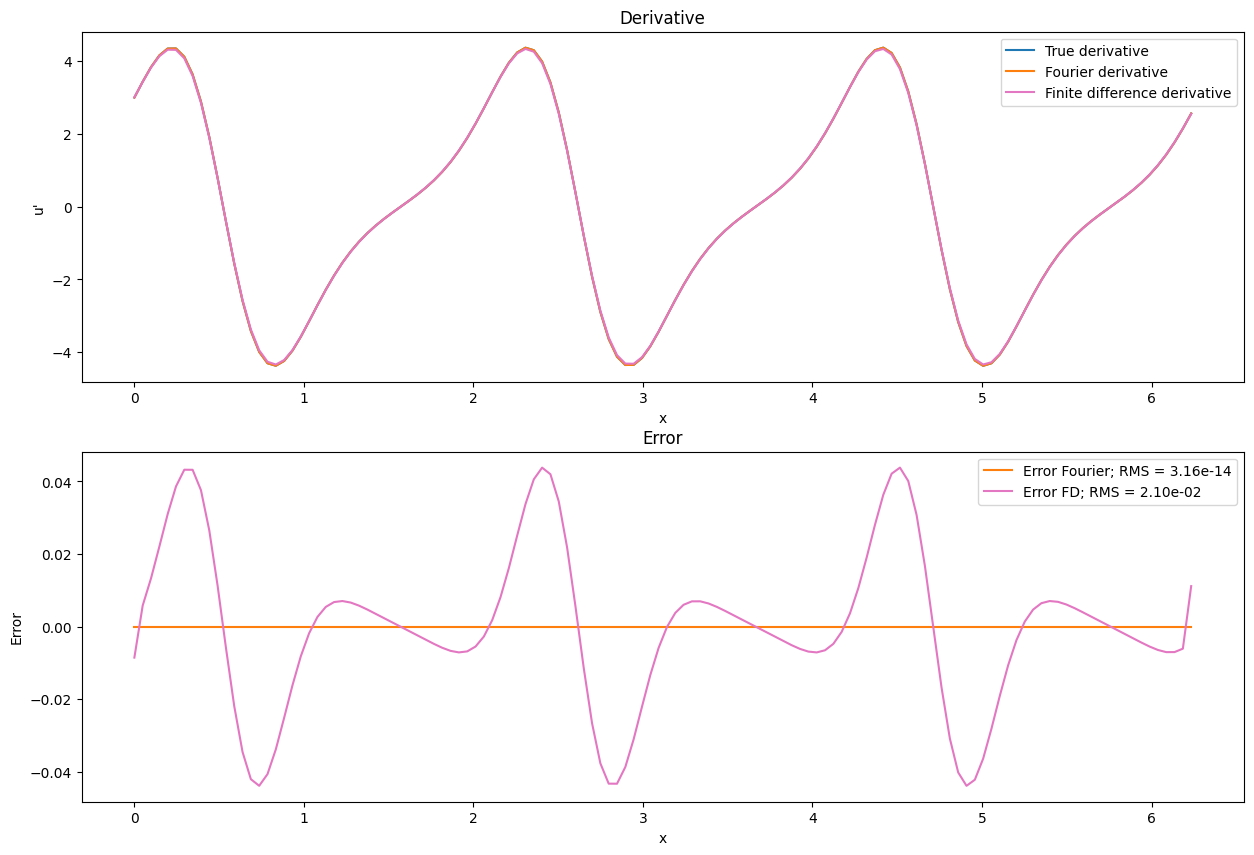

In [16]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt


def fourier_deriv(u, L):
    N = len(u)
    k = fftfreq(N, L/N)
    u_k = fft(u)
    u_k_prime = (1j * k * 2*np.pi) * u_k
    # On ne divise pas par L car les k issus de fftfreq sont déjà divisés par L !
    # Dans l'exercice suivant, on montre que la fonction rfft est plus rapide que fft pour des fonctions réelles
    return np.real(ifft(u_k_prime))


def f(x): return np.exp(np.sin(3.0*x))


def df(x): return 3.0 * np.cos(3.0*x) * \
    np.exp(np.sin(3.0*x))  # True derivative
# f = lambda x: np.exp(-(x - 3.0)**2 / 0.5) * x * (x**2 - 3.0)
# df = lambda x: np.exp(-(x - 3.0)**2 / 0.5) * (-2*(x - 3.0) / 0.5) * x * (x**2 - 3.0) \
#                + np.exp(-(x - 3.0)**2 / 0.5) * (3*x**2 - 3.0)


L = 2*np.pi
N = 128

x = np.arange(0, L, L/N)

u = f(x)
du_true = df(x)
du_fourier = fourier_deriv(u, L)

# Finite difference
D = np.zeros((len(x), len(x)))
for i in range(1, len(x)-1):
    D[i, i+1] = 1.0
    D[i, i-1] = -1.0
# Boundary conditions
D[0, 0] = -3.0
D[-1, -1] = 3.0
D[0, 1] = 4.0
D[-1, -2] = -4.0
D[0, 2] = -1.0
D[-1, -3] = 1.0
D = D / (2*(x[1] - x[0]))

df_fd = D @ u

fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0].plot(x, du_true, label="True derivative", c='C0')
ax[0].plot(x, du_fourier, label="Fourier derivative", c='C1')
ax[0].plot(x, df_fd, label="Finite difference derivative", c='C6')
ax[0].set_title("Derivative")
ax[0].set_xlabel("x")
ax[0].set_ylabel("u'")
ax[0].legend()

error_fourier = du_true - du_fourier
error_fd = du_true - df_fd

ax[1].plot(x, error_fourier,
           label=f"Error Fourier; RMS = {np.sqrt(np.nanmean(error_fourier**2)):.2e}", c='C1')
ax[1].plot(x, error_fd,
           label=f"Error FD; RMS = {np.sqrt(np.nanmean(error_fd**2)):.2e}", c='C6')
ax[1].set_title("Error")
ax[1].set_xlabel("x")
ax[1].set_ylabel("Error")
ax[1].legend()

plt.show()

# As wee see, the Fourier derivative is very accurate... inside the domain of the function and if it is periodic.
# It is however more expensive than sparse finite differences O(N) vs O(N^2) for the finite differences and O(N log N) for the FFT.

In [8]:
%reset -f

# Exercice 13

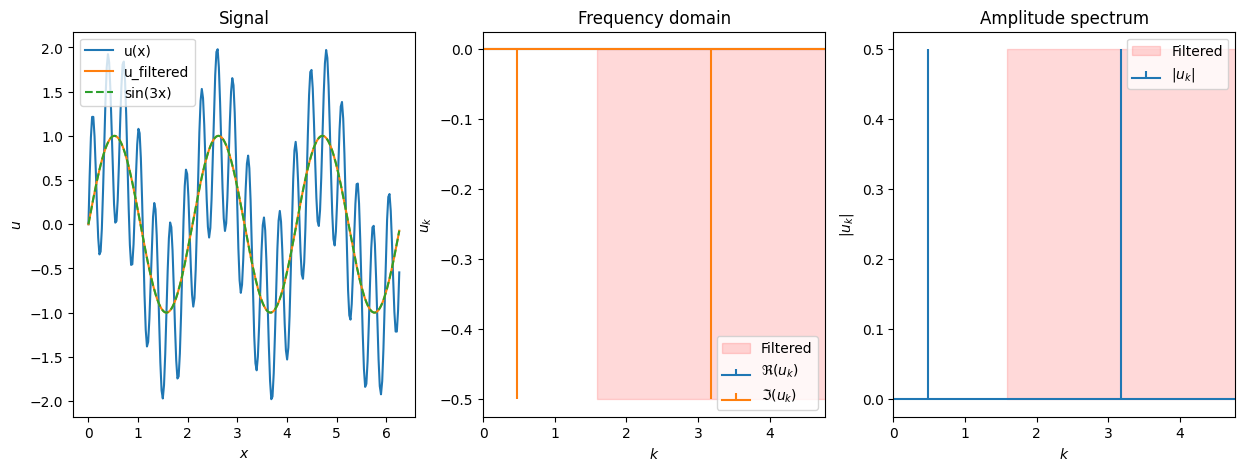

In [9]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

L = 2*np.pi
N = 2**8

x = np.linspace(0, L, N, endpoint=False)
# Input function
def f(x): return np.sin(3*x) + np.sin(20*x)
# => freqs = [3/(2*np.pi), 20/(2*np.pi)]

# On utilise rfft pour les fonctions réelles qui est optimisée et ne performe le calcul que sur les fréquences positives
# car la transformée de Fourier d'une fonction réelle est conjuguée symétrique


u = f(x)
freqs = rfftfreq(N, L/N)
u_k = rfft(u)

u_filtered_k = np.zeros(len(u_k), dtype=complex)
mask = np.abs(freqs) < 10.0/(2*np.pi)
u_filtered_k[mask] = u_k[mask]

u_filtered = irfft(u_filtered_k)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, u, label="u(x)", c='C0')
ax[0].plot(x, u_filtered, label="u_filtered", c='C1')
ax[0].plot(x, np.sin(3*x), label="sin(3x)", c='C2', linestyle='--')
ax[0].set_title("Signal")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$u$")
ax[0].legend()

ax[1].stem(freqs, np.real(u_k) / N, label="$\Re(u_k)$",
           markerfmt=" ", basefmt="C0")
ax[1].stem(freqs, np.imag(u_k) / N, label="$\Im(u_k)$",
           markerfmt=" ", basefmt="C1", linefmt="C1")
ax[1].fill_between(freqs, np.min(np.real(u_k) + np.imag(u_k)) / N, np.max(np.real(
    u_k) + np.imag(u_k)) / N, where=~mask, color='red', alpha=0.15, label="Filtered")
ax[1].set_title("Frequency domain")
ax[1].set_xlabel("$k$")
ax[1].set_ylabel("$u_k$")
ax[1].set_xbound(0.0, 30.0/L)
ax[1].legend()

ax[2].stem(freqs, np.abs(u_k) / N, markerfmt=" ",
           basefmt="C0", label="$|u_k|$")
ax[2].fill_between(freqs, np.min(np.abs(u_k)) / N, np.max(
    np.abs(u_k)) / N, where=~mask, color='red', alpha=0.15, label="Filtered")
ax[2].set_title("Amplitude spectrum")
ax[2].set_xlabel("$k$")
ax[2].set_ylabel("$|u_k|$")
ax[2].set_xbound(0.0, 30.0/L)
ax[2].legend()

plt.show()

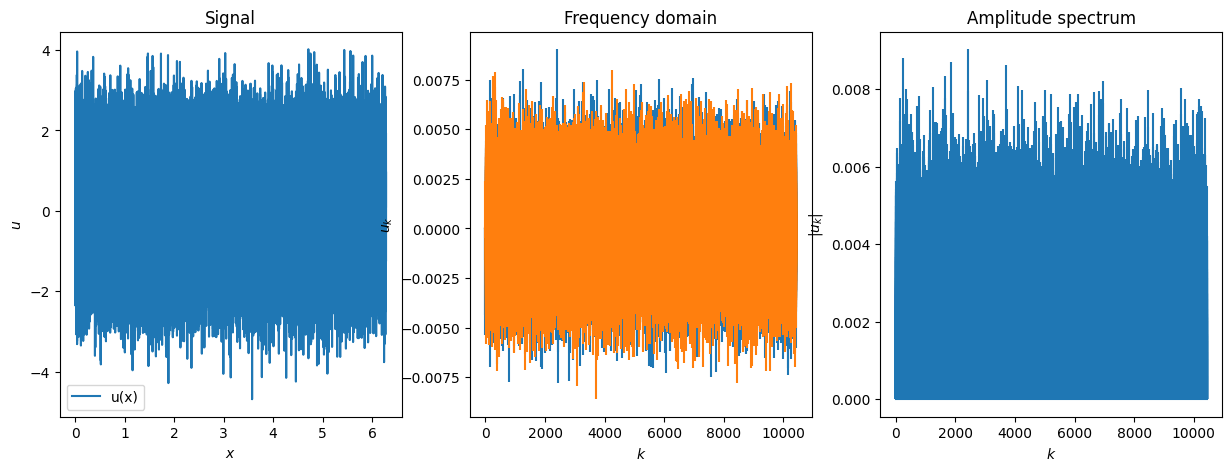

In [10]:
# Pour un bruit blanc, on s'attend à ce que la transformée de Fourier soit uniformément répartie en amplitude et en phase
# quand N -> infini

N = 2**17
L = 2*np.pi

x = np.linspace(0, L, N, endpoint=False)
u = np.random.randn(N)  # Bruit blanc gaussien -> moyenne nulle, variance 1

freqs = rfftfreq(N, L/N)
u_k = rfft(u)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, u, label="u(x)", c='C0')
ax[0].set_title("Signal")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$u$")
ax[0].legend()

ax[1].stem(freqs, np.real(u_k) / N, label="$\Re(u_k)$",
           markerfmt=" ", basefmt="C0")
ax[1].stem(freqs, np.imag(u_k) / N, label="$\Im(u_k)$",
           markerfmt=" ", basefmt="C1", linefmt="C1")
ax[1].set_title("Frequency domain")
ax[1].set_xlabel("$k$")
ax[1].set_ylabel("$u_k$")

ax[2].stem(freqs, np.abs(u_k) / N, markerfmt=" ",
           basefmt="C0", label="$|u_k|$")
ax[2].set_title("Amplitude spectrum")
ax[2].set_xlabel("$k$")
ax[2].set_ylabel("$|u_k|$")

plt.show()

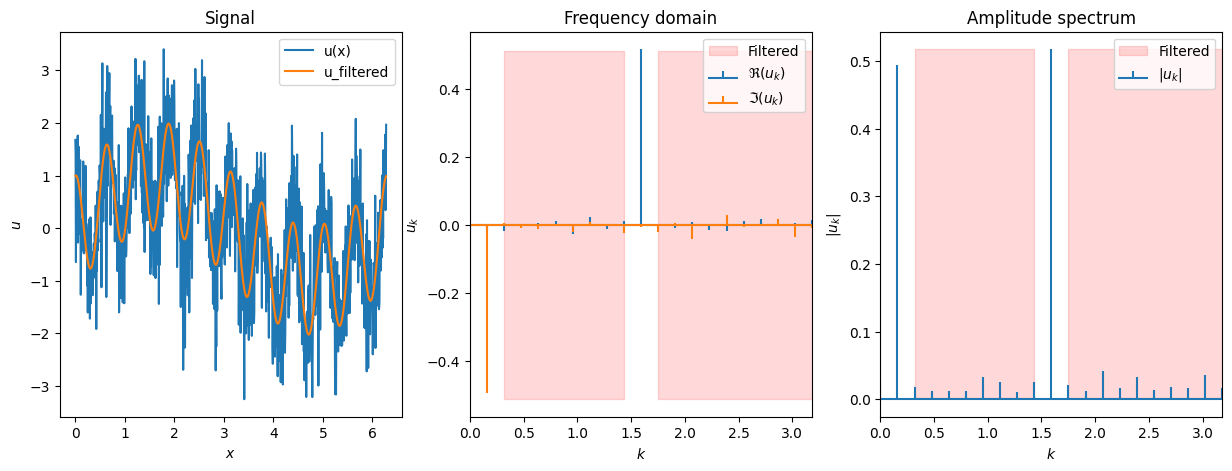

In [11]:
# On va donc essayer de filter une fonction bruitée avec un bruit blanc, mais on s'attend à ce que le bruit soit toujours présent
# car il est réparti uniformément en amplitude et en phase

N = 2**10
L = 2*np.pi

x = np.linspace(0, L, N, endpoint=False)
eps = 0.75  # Amplitude du bruit
u = np.sin(x)+np.cos(10*x)+eps*np.random.randn(N)

freqs = rfftfreq(N, L/N)
u_k = rfft(u)

u_filtered_k = np.zeros(len(u_k), dtype=complex)
# Je sais quelle est la véritable fréquence, donc je peux filtrer autour de cette fréquence
# En pratique, on ne sait pas quelle est la fréquence du bruit, donc on ne peut pas filter aussi facilement
# avec une fft mais on peut utiliser des méthodes de filtrage plus avancées.
width = 0.05/(2*np.pi)
mask = (np.abs(freqs - 1.0/(2*np.pi)) <
        width) | (np.abs(freqs - 10.0/(2*np.pi)) < width)
u_filtered_k[mask] = u_k[mask]

u_filtered = irfft(u_filtered_k)

# Plot signal, real and imaginary parts of the DFT
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, u, label="u(x)", c='C0')
ax[0].plot(x, u_filtered, label="u_filtered", c='C1')
ax[0].set_title("Signal")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$u$")
ax[0].legend()

ax[1].stem(freqs, np.real(u_k) / N, label="$\Re(u_k)$",
           markerfmt=" ", basefmt="C0")
ax[1].stem(freqs, np.imag(u_k) / N, label="$\Im(u_k)$",
           markerfmt=" ", basefmt="C1", linefmt="C1")
ax[1].fill_between(freqs, np.min(np.real(u_k) + np.imag(u_k)) / N, np.max(np.real(
    u_k) + np.imag(u_k)) / N, where=~mask, color='red', alpha=0.15, label="Filtered")
ax[1].set_title("Frequency domain")
ax[1].set_xlabel("$k$")
ax[1].set_ylabel("$u_k$")
ax[1].set_xbound(0.0, 20.0/L)
ax[1].legend()

ax[2].stem(freqs, np.abs(u_k) / N, markerfmt=" ",
           basefmt="C0", label="$|u_k|$")
ax[2].fill_between(freqs, np.min(np.abs(u_k)) / N, np.max(
    np.abs(u_k)) / N, where=~mask, color='red', alpha=0.15, label="Filtered")
ax[2].set_title("Amplitude spectrum")
ax[2].set_xlabel("$k$")
ax[2].set_ylabel("$|u_k|$")
ax[2].set_xbound(0.0, 20.0/L)
ax[2].legend()

plt.show()

In [12]:
%reset -f

# Exercice 14

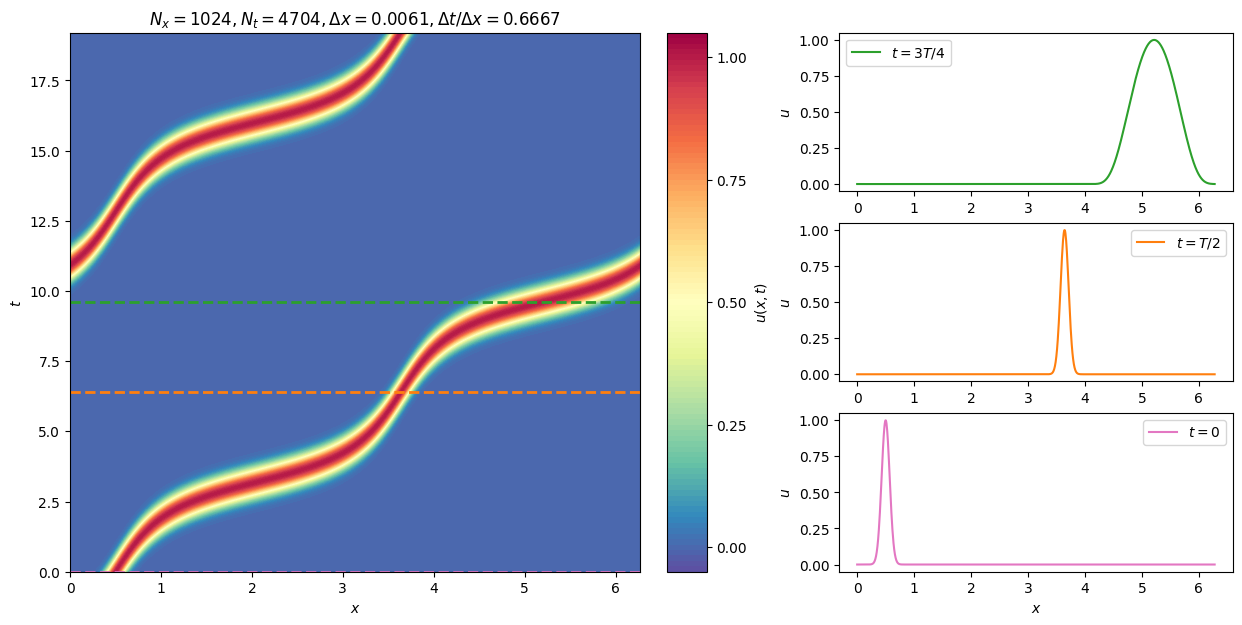

In [13]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Advection lineaire avec vitesse variable


def c(x): return 1.0/5.0 + np.sin(x-0.5)**2
def u0(x): return np.exp(-100*(x-0.5)**2)


N_x = 2**10
L = 2.0*np.pi
T = 5*np.sqrt(2/3)*np.pi  # Période : T = int_0^{L} dx / c(x)
t_max = 1.5*T
# Que devient la condition CFL si c est variable et que l'on utilise une méthode spectrale ?
dt = 0.80 * L / N_x / (1.0 + 1.0/5.0)
x = np.linspace(0, L, N_x, endpoint=False)
t = np.arange(0, t_max, dt)
N_t = len(t)

freqs = fftshift(fftfreq(N_x, 1/N_x))
u_sol = np.zeros((N_t, N_x))
u_sol[0, :] = u0(x)

# On réutilise la fft normale ainsi que le shift car c'est beaucoup plus simple si tout
# est bien ordonné...

c1 = 0.25j * np.exp(1j)
c2 = 0.25j * np.exp(-1j)


def __du(u_k):
    du_dummy = np.zeros_like(u_k, dtype=complex)
    d1 = -7j / 10 * freqs * u_k
    d2 = np.zeros_like(u_k, dtype=complex)
    d3 = np.zeros_like(u_k, dtype=complex)
    d2[:-2] = c1 * u_k[2:] * freqs[2:]
    d3[2:] = c2 * u_k[:-2] * freqs[:-2]
    du_dummy = d1 + d2 + d3
    return du_dummy


# RK4 : (Euler explicite est une cata...)
for n in range(N_t-1):
    u_k = fftshift(fft(u_sol[n, :]))
    k1 = __du(u_k)
    k2 = __du(u_k + 0.5*dt*k1)
    k3 = __du(u_k + 0.5*dt*k2)
    k4 = __du(u_k + dt*k3)
    u_k = u_k + dt/6.0 * (k1 + 2*k2 + 2*k3 + k4)
    u_sol[n+1, :] = np.real(ifft(ifftshift(u_k)))
# /!\ Si on souhaite modifier la taille du domaine, il faut recalculer les équation de Galerkin !
# Malheureusement, cela conduira à une fonction __du plus complexe et si L n'est pas un multiple de pi...

# Il est également possible, et probablement plus simple sans forcément être plus lent, d'implémenter
# une stratégie hybride où la dérivée dans l'espace est remplacée par F^-1 {ik F{u}}
# Ex:
# k_hat = 1j * rfftfreq(N_x, 1/N_x) * 2*np.pi / L
# for n in range(1, N_t):
#     k1 = - c(x) * irfft(k_hat * rfft(u_sol[n-1, :]))
#     k2 = - c(x) * irfft(k_hat * rfft(u_sol[n-1, :] + 0.5 * dt * k1))
#     k3 = - c(x) * irfft(k_hat * rfft(u_sol[n-1, :] + 0.5 * dt * k2))
#     k4 = - c(x) * irfft(k_hat * rfft(u_sol[n-1, :] + dt * k3))
#     u_sol[n, :] = u_sol[n-1, :] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6.0
# # Dans ce cas, modifier le domaine est plus simple car et ne nécessite aucun changement.

# Pour éviter un overload de la RAM, on ne va prendre que quelques instants selon un masque
nt_plot = min(N_t, 512)  # nombre de points à plotter selon t
mask_t = np.linspace(0, N_t, nt_plot, dtype=int, endpoint=False)
nx_plot = min(N_x, 512)  # nombre de points à plotter selon x
mask_x = np.linspace(0, N_x, nx_plot, dtype=int, endpoint=False)

u_masked = u_sol[mask_t, :][:, mask_x]

[xx, tt] = np.meshgrid(x[mask_x], t[mask_t])

fig = plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(3, 4, width_ratios=[1.45, 0.1, 0.20, 1.0])

# Contour plot
ax0 = plt.subplot(gs[:, 0])
contour = ax0.contourf(
    xx, tt, u_masked, np.linspace(-0.05, 1.05, 100), cmap='Spectral_r')
ax0.set_title("$N_x = %d, N_t = %d, \Delta x = %.4f, \Delta t / \Delta x = %.4f$" %
              (N_x, N_t, L/N_x, dt/(L/N_x)))
ax0.set_xlabel("$x$")
ax0.set_ylabel("$t$")

# Colorbar
cax = plt.subplot(gs[:, 1])
cbar = fig.colorbar(contour, cax=cax)
cbar.set_ticks(np.linspace(0, 1.0, 5))
cbar.set_label("$u(x,t)$")

# Right plots
ax20 = plt.subplot(gs[2, 3])
ax20.plot(x, u_sol[0, :], label="$t=0$", c='C6')
ax0.axhline(t[0], color='C6', lw=2, linestyle='--')
ax20.set_xlabel("$x$")
ax20.set_ylabel("$u$")
ax20.legend()

ind_T2 = np.argmin(np.abs(t - T/2))
ax21 = plt.subplot(gs[1, 3])
ax21.plot(x, u_sol[ind_T2, :], label="$t=T/2$", c='C1')
ax0.axhline(t[ind_T2], color='C1', lw=2, linestyle='--')
# ax21.set_xlabel("$x$")
ax21.set_ylabel("$u$")
ax21.legend()

ind_3T4 = np.argmin(np.abs(t - 3*T/4))
ax22 = plt.subplot(gs[0, 3])
ax22.plot(x, u_sol[ind_3T4, :], label="$t=3T/4$", c='C2')
ax0.axhline(t[ind_3T4], color='C2', lw=2, linestyle='--')
# ax22.set_xlabel("$x$")
ax22.set_ylabel("$u$")
ax22.legend()

plt.subplots_adjust(wspace=0.1)  # , hspace=0.4)
plt.show()

# Exercice 15

In [14]:
%reset -f

In [15]:
# TODO : diffusion